# Investigating bilateral symmetry

This notebook uses `cect`, the _C. elegans_ Connectome Toolbox, to investigate how bilateral symmetry in _C. elegans_ changes over development 

[Source of this file on GitHub](https://github.com/openworm/ConnectomeToolbox/blob/main/docs/notebooks/BilateralSymmetry.ipynb) 


### 1) Install the cect package using pip

If the package has not already been installed, use `pip` to install it.

In [1]:
#!pip install -q cect # uncomment this line to install the latest version 
# of cect from PyPI if you haven't already

print(f"cect version: {__import__('cect').__version__} is installed")

cect version: 0.2.7 is installed


### 2) Import methods from cect

In [2]:
# Helper method to load data sets by name
from cect.Utils import get_connectome_dataset       
# Helper method to apply a specific "view" (e.g. only Sensory or motor neurons) to a connectome dataset
from cect.ConnectomeView import get_view    
# Method to convert a connectivity matrix into a binary array indicating symmetric connections
from cect.Analysis import convert_to_symmetry_array         


cect      >>>  Opened the Excel file for Ripoll Sanchez et al: /opt/homebrew/anaconda3/envs/py312/lib/python3.12/site-packages/cect/data/1-s2.0-S0896627323007560-mmc7.xlsx


### 3) Specify connectome datasets to use, views to examine, and extract symmetry info

In [3]:
datasets = ["Witvliet1", "Witvliet2", "Witvliet3", "Witvliet4", "Witvliet5", \
    "Witvliet6", "Yim2024", "White_L4", "Witvliet7", "Witvliet8", "Cook2019Herm"]
views = ["SensorySomaticH", "MotorSomaticH", "InterneuronsSomaticH", "Neurons"] 
synclass = "Chemical"

symmetries = {} # to store the percentage of symmetric connections

for dataset_name in datasets:
    cds = get_connectome_dataset(dataset_name, from_cache=True)

    for view in views:
        v = get_view(view) # get the ConnectomeView object for the current view name

        if v.name not in symmetries: symmetries[v.name] = []
        cds_view = cds.get_connectome_view(v)

        conns, percentage, sym_info = convert_to_symmetry_array(cds_view, [synclass])
        symmetries[v.name].append(percentage)

### 4) Plot bilateral symmetry across datasets

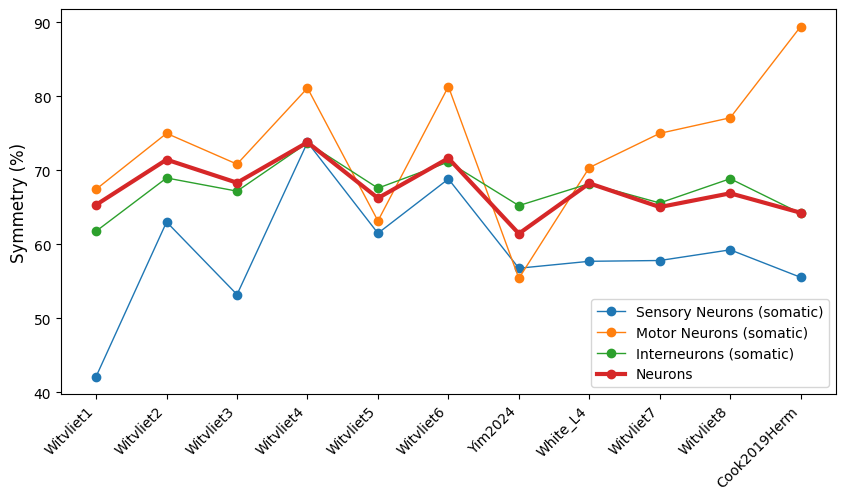

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_ylabel("Symmetry (%)", fontsize=12)

for view in symmetries:
    ax.plot(datasets, symmetries[view], marker="o", linestyle="-", \
        label=view, linewidth=3 if view == "Neurons" else 1,)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

ax.legend()
plt.show()